###### Importing the basic libraries:

In [1]:
import numpy as np
import pandas as pd
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt # we only need pyplot
import scipy as sc
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

# Visualisation of Oscar Data

###### Obtaining the Oscar Award dataset:

In [2]:
oscarData = pd.read_csv('fullOscarData.csv')
oscarData.head()

Unnamed: 0             Title  Year           Genre Genre 1  Rating  \
0           0           Sunrise  1927  Drama, Romance   Drama     8.1   
1           1             Wings  1927  Drama, Romance   Drama     7.6   
2           2   Hollywood Revue  1928   Comedy, Music  Comedy     5.8   
3           3           Morocco  1930  Drama, Romance   Drama     7.0   
4           4  The Public Enemy  1930    Crime, Drama   Crime     7.6   

   Runtime    Sales                                   Language Age Rating  \
0       94   121107                              None, English     Passed   
1      144      746                                    English       PG13   
2      130  5277780                                    English     Passed   
3       92      191  English, French, Spanish, Arabic, Italian     Passed   
4       83  1214260                                    English  Not Rated   

   ...             Director Cast2 Rank           Cast1 Cast3 Rank  \
0  ...          F.W. Murnau        387  George O'Brien     100000   
1  ...   William A. Wellman     100000       Clara Bow     100000   
2  ...      Charles Reisner     100000    Conrad Nagel     100000   
3  ...  Josef von Sternberg        241     Gary Cooper     100000   
4  ...   William A. Wellman        244    James Cagney     100000   

   Sum of Cast Rankings                   Cast2                Cast3  \
0                200387            Janet Gaynor  Margaret Livingston   
1                300000  Charles 'Buddy' Rogers        Richard Arlen   
2                300000              Jack Benny         John Gilbert   
3                100312        Marlene Dietrich       Adolphe Menjou   
4                100284             Jean Harlow         Edward Woods   

   Country of Origin Country of Origin 1 Number of Wins  
0      United States       United States              3  
1      United States       United States              1  
2      United States       United States              0  
3      United States       United States              0  
4      United States       United States              0  

[5 rows x 23 columns]

In [3]:
#clearing unneccessary columns
del oscarData["Unnamed: 0"]
oscarData.head()

Title  Year           Genre Genre 1  Rating  Runtime    Sales  \
0           Sunrise  1927  Drama, Romance   Drama     8.1       94   121107   
1             Wings  1927  Drama, Romance   Drama     7.6      144      746   
2   Hollywood Revue  1928   Comedy, Music  Comedy     5.8      130  5277780   
3           Morocco  1930  Drama, Romance   Drama     7.0       92      191   
4  The Public Enemy  1930    Crime, Drama   Crime     7.6       83  1214260   

                                    Language Age Rating  Director Rank  ...  \
0                              None, English     Passed         100000  ...   
1                                    English       PG13         100000  ...   
2                                    English     Passed         100000  ...   
3  English, French, Spanish, Arabic, Italian     Passed         100000  ...   
4                                    English  Not Rated         100000  ...   

              Director  Cast2 Rank           Cast1  Cast3 Rank  \
0          F.W. Murnau         387  George O'Brien      100000   
1   William A. Wellman      100000       Clara Bow      100000   
2      Charles Reisner      100000    Conrad Nagel      100000   
3  Josef von Sternberg         241     Gary Cooper      100000   
4   William A. Wellman         244    James Cagney      100000   

  Sum of Cast Rankings                   Cast2                Cast3  \
0               200387            Janet Gaynor  Margaret Livingston   
1               300000  Charles 'Buddy' Rogers        Richard Arlen   
2               300000              Jack Benny         John Gilbert   
3               100312        Marlene Dietrich       Adolphe Menjou   
4               100284             Jean Harlow         Edward Woods   

  Country of Origin Country of Origin 1 Number of Wins  
0     United States       United States              3  
1     United States       United States              1  
2     United States       United States              0  
3     United States       United States              0  
4     United States       United States              0  

[5 rows x 22 columns]

###### Description of the dataset, is as follows.

> **Title** : Title of the nominated film        
> **Year** :  Year of film release (runs from 1927 to 2021)  
> **Genre** : Genre of the film (crime, drama, adventure, comedy, etc.)                   
> **Genre 1** : The first genre of the film that appears on the IMDB page                    
> **Rating** : IMDB Ratings of the film upon 10             
> **Runtime** : Duration of the film in minutes           
> **Sales** : Worldwide box office sales generated                
> **Language** : Languages the film was released in                  
> **Age Rating** : Classification of films based on age appropriateness                     
> **Director** : Director of the film                                          
> **Director Rank** : Director's ranking in the Top 50 directors IMDB list                            
> **Cast1, Cast2, Cast3** : Top 3 casts of the film                             
> **Cast1 Rank, Cast2 Rank, Cast3 Rank** : Cast's ranking in the Top 1000 Actors and Actresses IMDB list                       
> **Sum of Cast Rankings** : Total rank of the top 3 casts of the film                                  
> **Country of Origin** : Countries where the film was first released                    
> **Country of Origin 1** : The first country where the film was first released according to the IMDB website              
> **Number of Wins** : Total number of times the film has won at the Oscars                              
---

###### Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [4]:
print("Data type : ", type(oscarData))
print("Data dims : ", oscarData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1658, 22)


###### Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [5]:
print(oscarData.dtypes)

Title                    object
Year                      int64
Genre                    object
Genre 1                  object
Rating                  float64
Runtime                   int64
Sales                     int64
Language                 object
Age Rating               object
Director Rank             int64
English Film             object
Cast1 Rank                int64
Director                 object
Cast2 Rank                int64
Cast1                    object
Cast3 Rank                int64
Sum of Cast Rankings      int64
Cast2                    object
Cast3                    object
Country of Origin        object
Country of Origin 1      object
Number of Wins            int64
dtype: object


## Numerical Data:

###### We will start by taking a look at all the numerical data. 
<p> We will extract all the numerical variables and their associated data as a Pandas `DataFrame`.

In [6]:
numericalData = oscarData[["Rating","Runtime", "Sales", "Director Rank","Sum of Cast Rankings"]]
numericalData.head()

Rating  Runtime    Sales  Director Rank  Sum of Cast Rankings
0     8.1       94   121107         100000                200387
1     7.6      144      746         100000                300000
2     5.8      130  5277780         100000                300000
3     7.0       92      191         100000                100312
4     7.6       83  1214260         100000                100284

Our variables range from the popularity of all star casts, the popularity of the director to the critic ratings, runtime and film sales. These are variables which could attribute to an "Oscar-winning" movie.

###### Let us now check the Summary Statistics of this DataFrame using `describe`.

In [7]:
numericalData.describe()

Rating      Runtime         Sales  Director Rank  \
count  1658.000000  1658.000000  1.658000e+03    1658.000000   
mean      7.289445   120.054885  1.302313e+08   82572.412545   
std       0.694224    24.333927  2.481468e+08   37942.075798   
min       3.800000    27.000000  1.000000e+00       1.000000   
25%       6.900000   103.000000  5.890743e+06  100000.000000   
50%       7.400000   117.000000  3.468551e+07  100000.000000   
75%       7.700000   133.000000  1.323806e+08  100000.000000   
max       9.300000   242.000000  2.847380e+09  100000.000000   

       Sum of Cast Rankings  
count           1658.000000  
mean          134341.547045  
std           107251.079639  
min               33.000000  
25%             1780.250000  
50%           100904.500000  
75%           200648.750000  
max           300000.000000



###### Visualisation (Violin Plot):

We will be using a violin plot to visualise the complete distribution of the series. It combines boxplot with a kernel density estimate.

In [8]:
fig = make_subplots(rows=3, cols=2)


fig.add_trace(go.Violin(y=oscarData['Rating'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Rating'), row=1, col=1)
              
fig.add_trace(go.Violin(y=oscarData['Runtime'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='blueviolet', opacity=0.6,
                               x0='Runtime'), row=1, col=2)
              
fig.add_trace(go.Violin(y=oscarData['Sales'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightskyblue', opacity=0.6,
                               x0='Sales'), row=2, col=1)
              
fig.add_trace(go.Violin(y=oscarData['Director Rank'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='dimgray', opacity=0.6,
                               x0='Director Rank'), row=2, col=2)

fig.add_trace(go.Violin(y=oscarData['Sum of Cast Rankings'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='darkred', opacity=0.6,
                               x0='Sum of Cast Rankings'), row=3, col=1)

fig.update_layout(height=1000, width=900, showlegend=False, title="Violin Plot of Numerical Variables")
fig.show()

###### Explanation of graphs:

From the above, we can see that the violin plot for "Rating" and "Runtime" are not as skewed to either side, like for "Sales" and "Director Rank". It is more or less centered to the median value, and is the most dense there. This means that most of the data correspond to their respective median values.
<p>
For the variable "Sales", the violin plot is extremely skewed to the bottom. This shows that only a few films garnered huge sales that is almost ten times than that of the other films. Moreover, due to population growth and the rise of technology, films released at a later year could have garnered more sales than those released in the last century.
<p>
For the variable "Director Rank", the violin plot is also extremely skewed to the bottom. This was because our dataset for the top ranked directors were many times smaller than the list of film directors with films nominated for the Oscar Awards. Hence, for the majority of films, the director rank will be set to the default value of 100000.
<p>
Meanwhile, for "Sum of Cast Rankings", it is a multimodal violin plot with several peaks. This means that the number of popular casts in a film plays an important role in determining the overall popularity of casts in that film.
<p>
To better visualise the variables "Sum of Cast Rankings" and "Director Rankings", we will now change the default value of their ranks to NaN.

###### Re-visualising the variables "Sum of Cast Rankings" and "Director Rankings":

Create a new dataframe to change the rank values.

In [10]:
#copy the dataframe
newOscarData = pd.read_csv("fullOscarData1.csv")
del newOscarData["Unnamed: 0"]
newOscarData.head()

Title  Year           Genre Genre 1  Rating  Runtime    Sales  \
0           Sunrise  1927  Drama, Romance   Drama     8.1       94   121107   
1             Wings  1927  Drama, Romance   Drama     7.6      144      746   
2   Hollywood Revue  1928   Comedy, Music  Comedy     5.8      130  5277780   
3           Morocco  1930  Drama, Romance   Drama     7.0       92      191   
4  The Public Enemy  1930    Crime, Drama   Crime     7.6       83  1214260   

                                    Language Age Rating  Director Rank  ...  \
0                              None, English     Passed         100000  ...   
1                                    English       PG13         100000  ...   
2                                    English     Passed         100000  ...   
3  English, French, Spanish, Arabic, Italian     Passed         100000  ...   
4                                    English  Not Rated         100000  ...   

              Director  Cast2 Rank           Cast1  Cast3 Rank  \
0          F.W. Murnau         387  George O'Brien      100000   
1   William A. Wellman      100000       Clara Bow      100000   
2      Charles Reisner      100000    Conrad Nagel      100000   
3  Josef von Sternberg         241     Gary Cooper      100000   
4   William A. Wellman         244    James Cagney      100000   

  Sum of Cast Rankings                   Cast2                Cast3  \
0               200387            Janet Gaynor  Margaret Livingston   
1               300000  Charles 'Buddy' Rogers        Richard Arlen   
2               300000              Jack Benny         John Gilbert   
3               100312        Marlene Dietrich       Adolphe Menjou   
4               100284             Jean Harlow         Edward Woods   

  Country of Origin Country of Origin 1 Number of Wins  
0     United States       United States              3  
1     United States       United States              1  
2     United States       United States              0  
3     United States       United States              0  
4     United States       United States              0  

[5 rows x 22 columns]

Remove the existing director rank, cast and sum of cast rankings columns.

In [11]:
del newOscarData["Director Rank"]
del newOscarData["Cast1 Rank"]
del newOscarData["Cast2 Rank"]
del newOscarData["Cast3 Rank"]
del newOscarData["Sum of Cast Rankings"]

Getting our Top 50 director dataset:

In [12]:
directorData = pd.read_csv('Top 50 directors.csv')
directorData.head()

Rank      Name of Director
0     1      Steven Spielberg
1     2       Martin Scorsese
2     3  Francis Ford Coppola
3     4       Stanley Kubrick
4     5      Alfred Hitchcock

Getting our Top 1000 Actors and Actresses dataset:

In [13]:
actorData = pd.read_csv('Top 1000 Actors and Actresses.csv')
actorData.head()

Position      Const     Created    Modified  Description  \
0         1  nm0000134  2014-03-09  2014-03-09          NaN   
1         2  nm0000197  2014-03-09  2015-10-25          NaN   
2         3  nm0000008  2014-03-09  2014-03-09          NaN   
3         4  nm0000243  2014-03-09  2014-03-09          NaN   
4         5  nm0000031  2014-03-09  2014-03-09          NaN   

                Name           Known For  Birth Date  
0     Robert De Niro         Raging Bull  1943-08-17  
1     Jack Nicholson           Chinatown  1937-04-22  
2      Marlon Brando      Apocalypse Now  1924-04-03  
3  Denzel Washington              Fences  1954-12-28  
4  Katharine Hepburn  The Lion in Winter  1907-05-12

Now, we will add the director and individual cast rank columns and the default value will be set as positive infinity, unlike the previous 100000. This is the same as for the sum of cast rankings.

In [14]:
newOscarData.insert(9, "Director Rank", np.nan)
newOscarData.insert(11, "Cast1 Rank", np.nan)
newOscarData.insert(13, "Cast2 Rank", np.nan)
newOscarData.insert(15, "Cast3 Rank", np.nan)
newOscarData.insert(16, "Sum of Cast Rankings", np.nan)

Adding director rankings:

In [15]:
yes = 0
for i in range(0,len(newOscarData)):
    for j in range(0,len(directorData)):
        if(newOscarData['Director'][i] == directorData['Name of Director'][j]):
            newOscarData.at[i,'Director Rank'] = directorData['Rank'][j]
            yes = 1
    if yes != 1:
        newOscarData.at[i,'Director Rank'] = np.nan
    yes = 0

Adding actor and actresses rankings:

In [16]:
yes1 = 0
yes2 = 0
yes3 = 0
for i in range(0,len(newOscarData)):
    for j in range(0,len(actorData)):
        if(newOscarData['Cast1'][i].strip() == actorData['Name'][j]):
            newOscarData.at[i,'Cast1 Rank'] = actorData['Position'][j]
            yes1 = 1
            
        if(newOscarData['Cast2'][i].strip() == actorData['Name'][j]):
            newOscarData.at[i,'Cast2 Rank'] = actorData['Position'][j]
            yes2 = 1
            
        if(newOscarData['Cast3'][i].strip() == actorData['Name'][j]):
            newOscarData.at[i,'Cast3 Rank'] = actorData['Position'][j]
            yes3 = 1
            
    #if there was no corresponding rank data, the rank remains at float("inf")       
    if yes1 != 1:
        newOscarData.at[i,'Cast1 Rank'] = np.nan
        
    if yes2 != 1:
        newOscarData.at[i,'Cast2 Rank'] = np.nan
        
    if yes3 != 1:
        newOscarData.at[i,'Cast3 Rank'] = np.nan
        
    #initialize all yes variables back to 0
    yes1 = 0
    yes2 = 0
    yes3 = 0

Adding sum of cast rankings:

In [17]:
sum = 0

for i in range(0,len(newOscarData)):
    if math.isnan(newOscarData['Cast1 Rank'][i]) == False:
        sum += newOscarData['Cast1 Rank'][i]
        
    if math.isnan(newOscarData['Cast2 Rank'][i]) == False:
        sum += newOscarData['Cast2 Rank'][i]
        
    if math.isnan(newOscarData['Cast3 Rank'][i]) == False:
        sum += newOscarData['Cast3 Rank'][i]
    
    if sum == 0:
        sum = np.nan
        
    newOscarData.at[i,'Sum of Cast Rankings'] = sum
    sum = 0

The newOscarData dataframe with all our predictors:

In [19]:
newOscarData.head()

Title  Year           Genre Genre 1  Rating  Runtime    Sales  \
0           Sunrise  1927  Drama, Romance   Drama     8.1       94   121107   
1             Wings  1927  Drama, Romance   Drama     7.6      144      746   
2   Hollywood Revue  1928   Comedy, Music  Comedy     5.8      130  5277780   
3           Morocco  1930  Drama, Romance   Drama     7.0       92      191   
4  The Public Enemy  1930    Crime, Drama   Crime     7.6       83  1214260   

                                    Language Age Rating  Director Rank  ...  \
0                              None, English     Passed            NaN  ...   
1                                    English       PG13            NaN  ...   
2                                    English     Passed            NaN  ...   
3  English, French, Spanish, Arabic, Italian     Passed            NaN  ...   
4                                    English  Not Rated            NaN  ...   

              Director  Cast2 Rank           Cast1  Cast3 Rank  \
0          F.W. Murnau       387.0  George O'Brien         NaN   
1   William A. Wellman         NaN       Clara Bow         NaN   
2      Charles Reisner         NaN    Conrad Nagel         NaN   
3  Josef von Sternberg       241.0     Gary Cooper         NaN   
4   William A. Wellman       244.0    James Cagney         NaN   

  Sum of Cast Rankings                   Cast2                Cast3  \
0                387.0            Janet Gaynor  Margaret Livingston   
1                  NaN  Charles 'Buddy' Rogers        Richard Arlen   
2                  NaN              Jack Benny         John Gilbert   
3                312.0        Marlene Dietrich       Adolphe Menjou   
4                284.0             Jean Harlow         Edward Woods   

  Country of Origin Country of Origin 1 Number of Wins  
0     United States       United States              3  
1     United States       United States              1  
2     United States       United States              0  
3     United States       United States              0  
4     United States       United States              0  

[5 rows x 22 columns]

Let us now check the Summary Statistics of this new DataFrame using `describe`.

In [21]:
newOscarData.describe()

Year       Rating      Runtime         Sales  Director Rank  \
count  1658.000000  1658.000000  1658.000000  1.658000e+03     289.000000   
mean   1991.746683     7.289445   120.054885  1.302313e+08      17.508651   
std      19.772753     0.694224    24.333927  2.481468e+08      13.717414   
min    1927.000000     3.800000    27.000000  1.000000e+00       1.000000   
25%    1982.000000     6.900000   103.000000  5.890743e+06       6.000000   
50%    1995.000000     7.400000   117.000000  3.468551e+07      13.000000   
75%    2007.000000     7.700000   133.000000  1.323806e+08      28.000000   
max    2019.000000     9.300000   242.000000  2.847380e+09      50.000000   

        Cast1 Rank  Cast2 Rank  Cast3 Rank  Sum of Cast Rankings  \
count  1191.000000  926.000000  639.000000           1335.000000   
mean    294.283795  352.323974  409.297340            702.835206   
std     281.238067  284.134716  279.826031            494.747553   
min       1.000000    1.000000    1.000000              2.000000   
25%      77.500000  113.000000  167.000000            277.500000   
50%     171.000000  254.500000  349.000000            668.000000   
75%     502.500000  568.000000  663.000000            993.000000   
max     999.000000  999.000000  997.000000           2405.000000   

       Number of Wins  
count     1658.000000  
mean         0.686369  
std          1.410991  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max         11.000000

###### We will now plot for "Director Rank" and "Sum of Cast Rankings" again.

In [22]:
fig = make_subplots(rows=1, cols=2)


fig.add_trace(go.Violin(y=newOscarData['Director Rank'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='dimgray', opacity=0.6,
                               x0='Director Rank'), row=1, col=1)

fig.add_trace(go.Violin(y=newOscarData['Sum of Cast Rankings'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='darkred', opacity=0.6,
                               x0='Sum of Cast Rankings'), row=1, col=2)

fig.update_layout(height=500, width=900, showlegend=False, title="Violin Plot of Numerical Variables Director Rank and Sum of Cast Rankings")
fig.show()

###### Explanation of new graphs:

For the above graphs, we only focus on those directors and casts who have ranks in the imdb system. Of which, many of the casts and directors have the median ranking of 668 and 13 respectively.
<p>
It is to be noted that the graphs are still multimodal, with director rank having 2 peaks while the sum of cast rankings having 3 peaks. This means that there are 2 ranks that occur most frequently for the directors and 3 ranks that occur most frequently for the sum of the cast's rankings.
<p>
Moreover, it might seem that there are negative rankings, however this occured due to values that were extremely close to 0.

### Checking the effect of the numerical variables on Number of Wins

This is the variable we are trying to determine using our predictors
<p>
Hence, we need to first take a look at the visualisation of this variable.

In [40]:
print("Number of possible wins, including 0:", len(oscarData["Number of Wins"].unique()))

print(oscarData["Number of Wins"].value_counts())
fig = px.histogram(oscarData, x="Number of Wins", color="Number of Wins", color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta", "brown", "black", "violet", "orange", "pink", "gray"])
fig.update_layout(showlegend=False)
fig.show()

Number of possible wins, including 0: 12
0     1113
1      311
2       93
3       53
4       35
5       23
7       12
6        7
8        5
11       3
9        2
10       1
Name: Number of Wins, dtype: int64


Out of the 1658 nominated films we have in our Oscar Award dataset, majority of the films did not manage to win at the Oscar Awards. However, there are some remarkable films which won more than 10 Oscar Awards. What then determines whether a film can win at the Oscar Awards? We will now be taking a look at the variables which influence this.

### Correlation between numerical data and the number of wins

We will now look for the relationship, more specifically, the correlation between each of our numerical variables and the number of wins. This helps us understand which variables influence the probability of a film winning at the Oscar Awards.

In [24]:
#creating a new dataframe to include the number of wins
numericalData = oscarData[["Rating","Runtime", "Sales", "Director Rank","Sum of Cast Rankings","Number of Wins"]]
numericalData.head()

Rating  Runtime    Sales  Director Rank  Sum of Cast Rankings  \
0     8.1       94   121107         100000                200387   
1     7.6      144      746         100000                300000   
2     5.8      130  5277780         100000                300000   
3     7.0       92      191         100000                100312   
4     7.6       83  1214260         100000                100284   

   Number of Wins  
0               3  
1               1  
2               0  
3               0  
4               0

Let's take a look at the summary statistics of this dataset:

In [25]:
numericalData.describe()

Rating      Runtime         Sales  Director Rank  \
count  1658.000000  1658.000000  1.658000e+03    1658.000000   
mean      7.289445   120.054885  1.302313e+08   82572.412545   
std       0.694224    24.333927  2.481468e+08   37942.075798   
min       3.800000    27.000000  1.000000e+00       1.000000   
25%       6.900000   103.000000  5.890743e+06  100000.000000   
50%       7.400000   117.000000  3.468551e+07  100000.000000   
75%       7.700000   133.000000  1.323806e+08  100000.000000   
max       9.300000   242.000000  2.847380e+09  100000.000000   

       Sum of Cast Rankings  Number of Wins  
count           1658.000000     1658.000000  
mean          134341.547045        0.686369  
std           107251.079639        1.410991  
min               33.000000        0.000000  
25%             1780.250000        0.000000  
50%           100904.500000        0.000000  
75%           200648.750000        1.000000  
max           300000.000000       11.000000

The following is the correlation values of the variables with each other.

In [26]:
numericalData.corr()

Rating   Runtime     Sales  Director Rank  \
Rating                1.000000  0.206522  0.138045      -0.231489   
Runtime               0.206522  1.000000  0.170809      -0.217515   
Sales                 0.138045  0.170809  1.000000      -0.153922   
Director Rank        -0.231489 -0.217515 -0.153922       1.000000   
Sum of Cast Rankings -0.043237 -0.201699 -0.242919       0.230031   
Number of Wins        0.305225  0.304458  0.162618      -0.097658   

                      Sum of Cast Rankings  Number of Wins  
Rating                           -0.043237        0.305225  
Runtime                          -0.201699        0.304458  
Sales                            -0.242919        0.162618  
Director Rank                     0.230031       -0.097658  
Sum of Cast Rankings              1.000000       -0.159087  
Number of Wins                   -0.159087        1.000000

We will now use a heatmap to determine which has the strongest correlation to the number of oscar wins. A variable with a stronger correlation will be shown in the heatmap with a darker colour intensity, depending on whether it is a positive or a negative correlation. A variable with a strong negative correlation will be closer to black, while a variable with a strong ositive correlation will be closer to beige.

<AxesSubplot:>

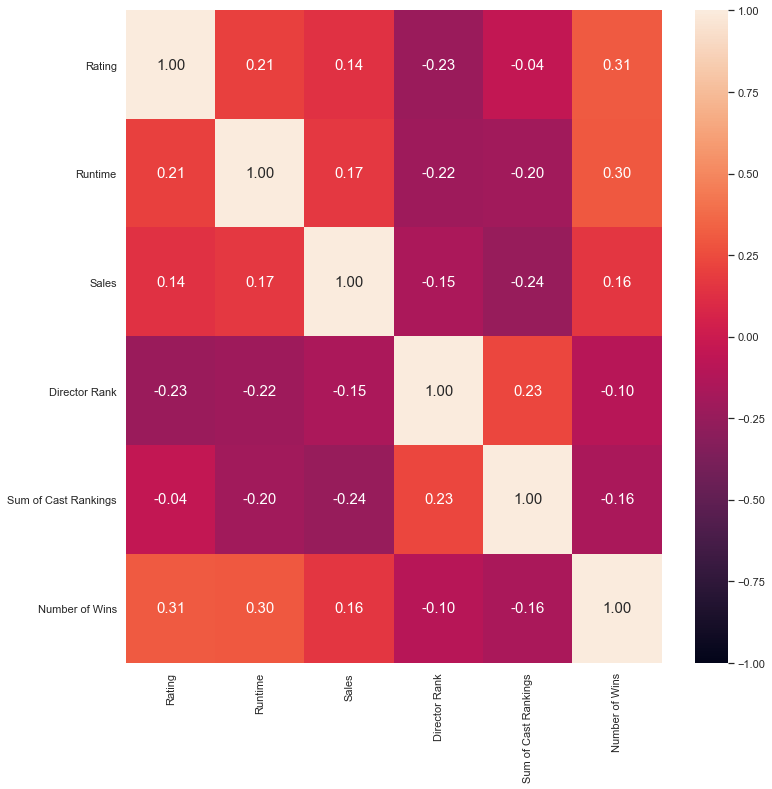

In [27]:
f = plt.figure(figsize=(12,12))
sb.heatmap(numericalData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {'fontsize': 15})

Upon looking at the heatmap, we observe that there does not seem to be much differences between the postive correlation coefficients of the variables as seen from the colours having mostly the same shade of red, and also not much differences between the negative correlation coefficients of the variables. Nevertheless, the differences between the negative correlation coefficients of the variabes are still bigger.

This lack of difference might be due to the director ranks and sum of cast rankings being multimodal, with one skewed to the left and one skewed to the right. As we had set the default values earlier as 100000, our directors and cast ranking data is limited, hence we will most definitely not get a smooth normal distribution. Let us now see the heatmap with the default values set as NaN.

###### New visualisation of heatmap:

In [28]:
#creating a new dataframe to include the number of wins
newNumericalData = newOscarData[["Rating","Runtime", "Sales", "Director Rank","Sum of Cast Rankings","Number of Wins"]]
newNumericalData.head()

Rating  Runtime    Sales  Director Rank  Sum of Cast Rankings  \
0     8.1       94   121107            NaN                 387.0   
1     7.6      144      746            NaN                   NaN   
2     5.8      130  5277780            NaN                   NaN   
3     7.0       92      191            NaN                 312.0   
4     7.6       83  1214260            NaN                 284.0   

   Number of Wins  
0               3  
1               1  
2               0  
3               0  
4               0

Let's take a look at this new dataframe

In [29]:
newNumericalData.describe()

Rating      Runtime         Sales  Director Rank  \
count  1658.000000  1658.000000  1.658000e+03     289.000000   
mean      7.289445   120.054885  1.302313e+08      17.508651   
std       0.694224    24.333927  2.481468e+08      13.717414   
min       3.800000    27.000000  1.000000e+00       1.000000   
25%       6.900000   103.000000  5.890743e+06       6.000000   
50%       7.400000   117.000000  3.468551e+07      13.000000   
75%       7.700000   133.000000  1.323806e+08      28.000000   
max       9.300000   242.000000  2.847380e+09      50.000000   

       Sum of Cast Rankings  Number of Wins  
count           1335.000000     1658.000000  
mean             702.835206        0.686369  
std              494.747553        1.410991  
min                2.000000        0.000000  
25%              277.500000        0.000000  
50%              668.000000        0.000000  
75%              993.000000        1.000000  
max             2405.000000       11.000000

In [30]:
pd.to_numeric(newNumericalData["Runtime"])

0        94
1       144
2       130
3        92
4        83
       ... 
1653    103
1654    123
1655    181
1656    118
1657    130
Name: Runtime, Length: 1658, dtype: int64

The following is the correlation values of the variables with each other.

In [31]:
newNumericalData.corr()

Rating   Runtime     Sales  Director Rank  \
Rating                1.000000  0.206522  0.138045      -0.097480   
Runtime               0.206522  1.000000  0.170809      -0.144409   
Sales                 0.138045  0.170809  1.000000      -0.004600   
Director Rank        -0.097480 -0.144409 -0.004600       1.000000   
Sum of Cast Rankings  0.007773 -0.034433  0.219155       0.157694   
Number of Wins        0.305225  0.304458  0.162618      -0.102557   

                      Sum of Cast Rankings  Number of Wins  
Rating                            0.007773        0.305225  
Runtime                          -0.034433        0.304458  
Sales                             0.219155        0.162618  
Director Rank                     0.157694       -0.102557  
Sum of Cast Rankings              1.000000       -0.029342  
Number of Wins                   -0.029342        1.000000

<AxesSubplot:>

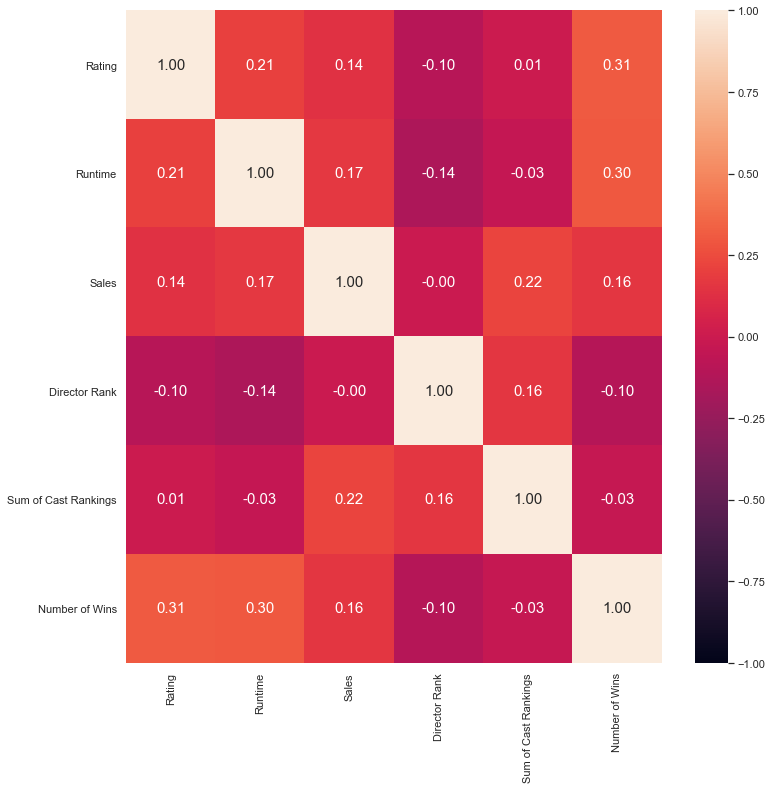

In [32]:
f = plt.figure(figsize=(12,12))
sb.heatmap(newNumericalData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {'fontsize': 15})

Upon looking at the heatmap, the correlation coefficient for director rank remained the same, but that of the sum of cast rankings decreased. This shows that the sum of cast rankings is not strongly correlated to the number of wins, despite only focusing on the films with actors having ranks in the IMDB list. 
<p>
    
Explanation for the other variables:
As we can see from the heatmap, there are 2 variables with the highest correlation coefficient - Rating and Runtime at 0.31 and 0.30 respectively. As this is a positive correlation coefficient, we can say that the longer the film duration, the more the awards won at the Oscars and the higher the rating of the film on IMDB, the more the awards won at the Oscars.
<p>
Apart from those two variables, the Sales variable does not have as high of a correlation with the number of oscar wins. This goes to show that Sales is not the variable influencing the number of oscar wins the most.
<p>
Finally, the overall heatmap shows that these predictors do not have a strong linear relationship with the Number of Wins as the correlation coefficients are relatively low. However, as these correlation coefficients only indicate the strength of linear relationships, we cannot draw the conclusion that our predictors are not good. They could have strong non-linear relationships, of which they will have a low correlation coefficient.
<p>
We will now further study these variables and explore the non-linear relationships.

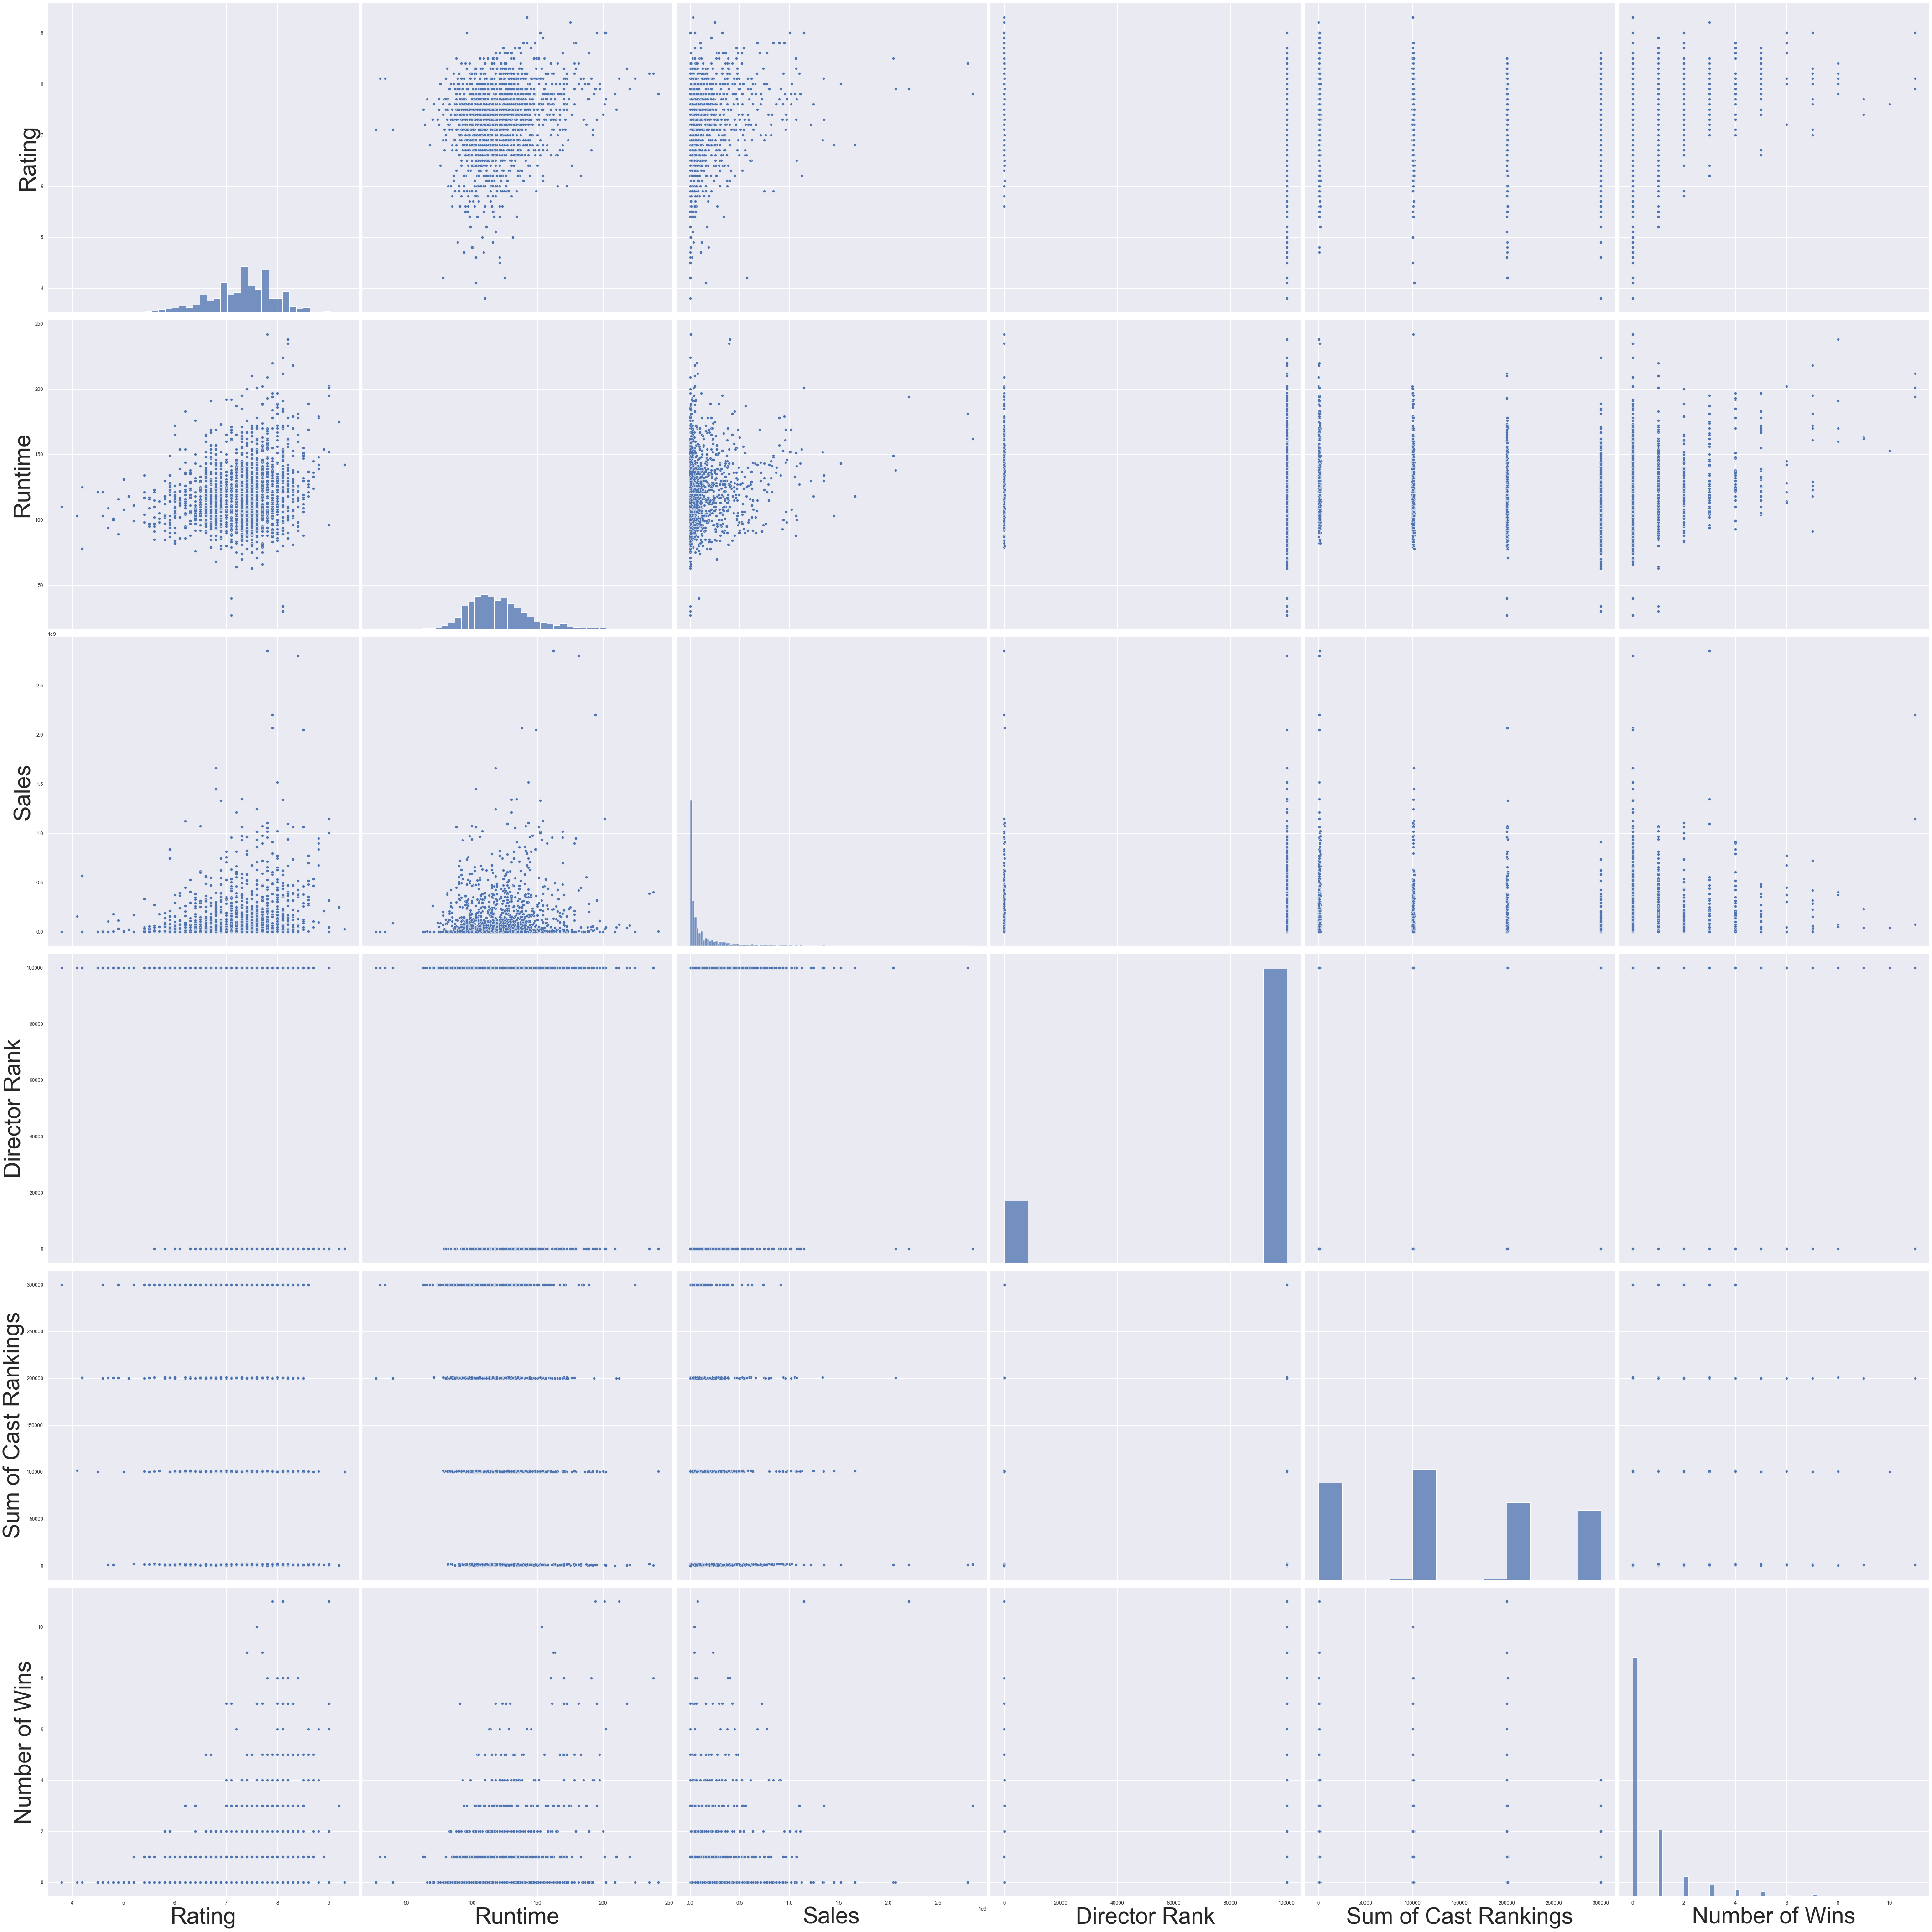

In [53]:
sb.pairplot(data = numericalData, height=10)
sb.set_context("notebook", rc={"axes.labelsize":100})

As we are more interested in seeing which predictors influence the film's number of oscar award wins, we plot the pairplot for the number of wins specifically.

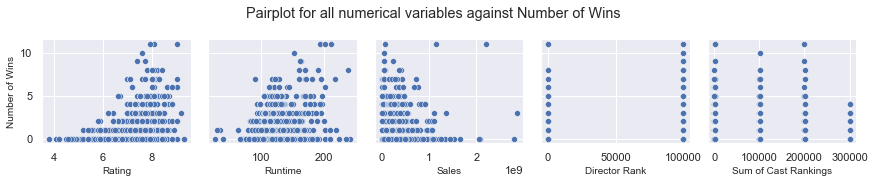

In [73]:
plota = sb.pairplot(data=numericalData,
                  y_vars=['Number of Wins'],
                  x_vars=['Rating', 'Runtime', 'Sales', 'Director Rank', 'Sum of Cast Rankings']) 
sb.set_context("notebook", rc={"axes.labelsize":10})
plota.fig.suptitle('Pairplot for all numerical variables against Number of Wins')
plota.fig.subplots_adjust(top=0.8)

The patterns of the pairplots can tell us the strength of the non-linear relationships between the number of wins and the variable. 
<p>
As seen from the pairplots, the ratings and runtime of the film greatly influence the number of wins at the oscars. As the ratings and runtime increase, the number of wins at the oscars increased too. 
<p>
Looking at the sales pairplot, the figure looks rather odd as we established earlier using the heatmap that an increase in sales results in a higher number of wins at the oscars but in this pairplot, the film with the highest sales did not win the most. Hence, we can conclude that sales is not the best predictor.
<p>
As the relationship between director rank and number of wins, and sum of cast rankings and number of wins cannot be determined from this pairplot, we will use the dataset with default values NaN. With this new default value, we can focus on the films with cast and director rankings in the IMDB respective lists to determine the relationship between the rankings and the number of wins.

###### Re-visualising the variables "Sum of Cast Rankings" and "Director Rankings":

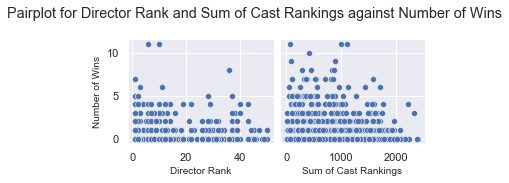

In [72]:
plotb = sb.pairplot(data=newNumericalData,
                  y_vars=['Number of Wins'],
                  x_vars=['Director Rank', 'Sum of Cast Rankings']) 
sb.set_context("notebook", rc={"axes.labelsize":10})
plotb.fig.suptitle('Pairplot for Director Rank and Sum of Cast Rankings against Number of Wins')
plotb.fig.subplots_adjust(top=0.8)

From the above pairplot, we can observe that a high concentration of data points lie on the left of the chart. We can thus establish the relationship that the lower the director rank or sum of cast rankings, the more the number of oscar wins for that film.

## Categorical Data:

We will move on to take a look at all the categorical data. We will extract all the categorical variables and their associated data as a Pandas `DataFrame`.

In [74]:
catData = pd.DataFrame(oscarData[['Age Rating', 'English Film', 'Genre 1', 'Country of Origin 1']])  # Predictor
catData = catData.astype('category')
wins = pd.DataFrame(oscarData['Number of Wins'])        # Response

Our variables range from the first stated genre of the film, age rating to the first country of origin and language (english or others). These are variables which could attribute to an "Oscar-winning" movie.

###### We will now take a look at each these variables using a categorical plot:

1. Genre 1

In [75]:
print(catData['Genre 1'].nunique())
catData['Genre 1'].value_counts()

17


Drama          475
Comedy         311
Action         237
Biography      196
Crime          127
Adventure      121
Animation      110
Documentary     53
Horror          11
Musical          4
Mystery          4
Film-Noir        3
Fantasy          2
Short            1
Family           1
Romance          1
Western          1
Name: Genre 1, dtype: int64

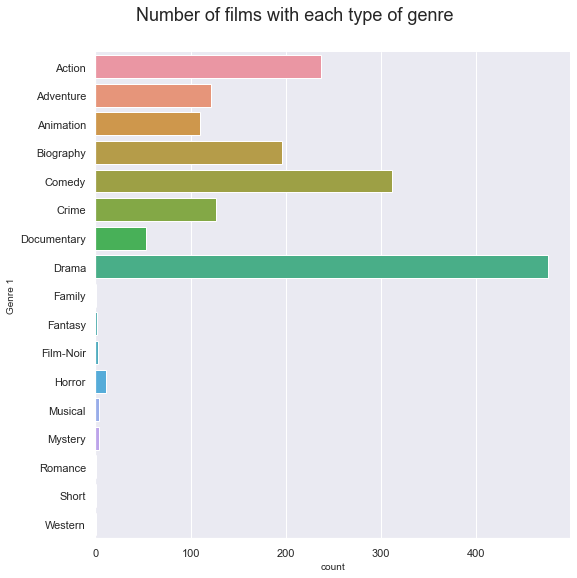

In [76]:
plot1 = sb.catplot(y = 'Genre 1', data = catData, kind = "count", height = 8)
plot1.fig.suptitle("Number of films with each type of genre", fontsize=18, fontdict={"weight": "bold"})
plot1.fig.subplots_adjust(top=.9)

2. Age Rating

In [77]:
print(catData['Age Rating'].nunique())
catData['Age Rating'].value_counts()

10


PG           755
NC-16        225
M18          198
R            192
PG13         106
G             62
Not Rated     53
Passed        36
Approved      24
(Banned)       7
Name: Age Rating, dtype: int64

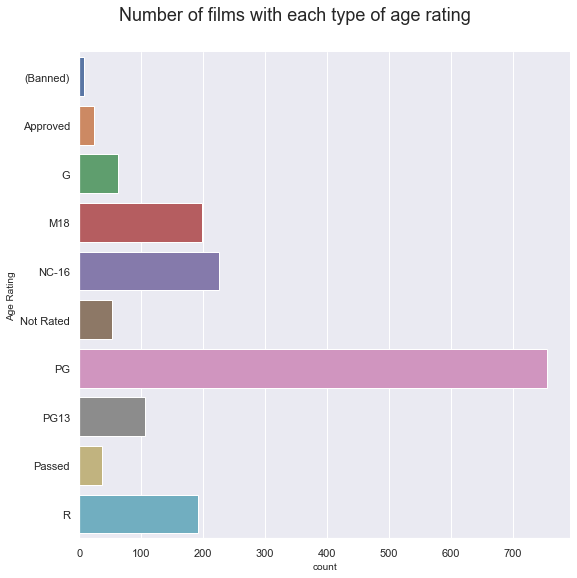

In [78]:
plot2 = sb.catplot(y = 'Age Rating', data = catData, kind = "count", height = 8)
plot2.fig.suptitle("Number of films with each type of age rating", fontsize=18, fontdict={"weight": "bold"})
plot2.fig.subplots_adjust(top=.9)

3. English Film

In [79]:
print(catData['English Film'].nunique())
catData['English Film'].value_counts()

2


Yes    1429
No      229
Name: English Film, dtype: int64

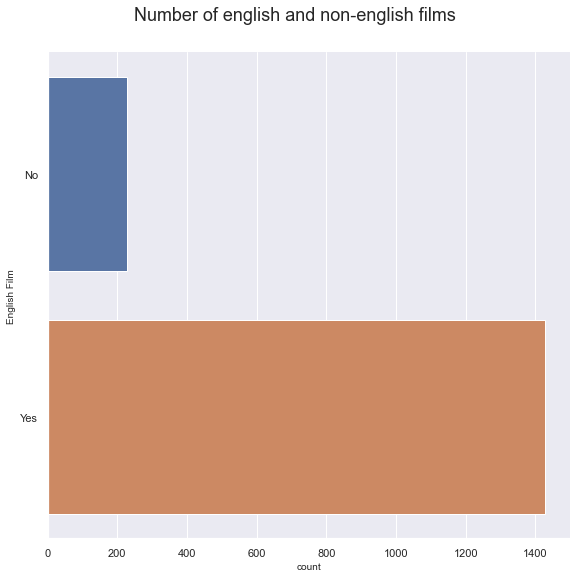

In [80]:
plot3 = sb.catplot(y = 'English Film', data = catData, kind = "count", height = 8)
plot3.fig.suptitle("Number of english and non-english films", fontsize=18, fontdict={"weight": "bold"})
plot3.fig.subplots_adjust(top=.9)

4. Country of Origin 1

In [81]:
print(catData['Country of Origin 1'].nunique())
catData['Country of Origin 1'].value_counts()

45


United States                     1153
United Kingdom                     200
France                              72
Germany                             19
Italy                               18
Canada                              15
Australia                           14
Spain                               14
Japan                               12
Denmark                             10
Ireland                              9
Sweden                               9
Mexico                               8
New Zealand                          8
Russia                               8
China                                8
Argentina                            7
Poland                               6
West Germany                         6
Hungary                              5
Switzerland                          4
Brazil                               4
Belgium                              4
Netherlands                          4
Iran                                 3
Israel                   

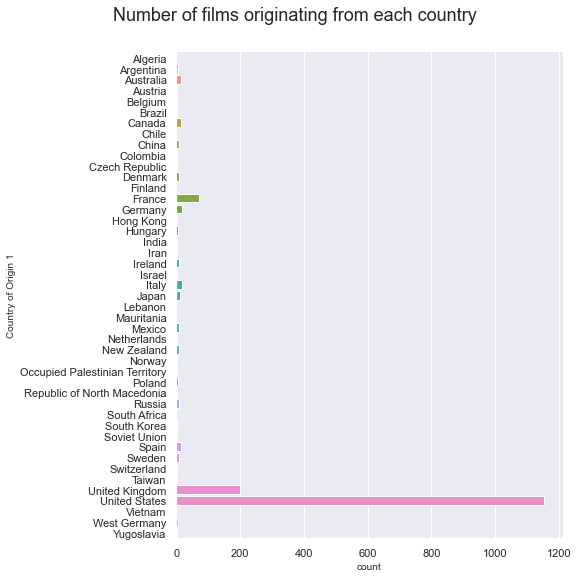

In [82]:
plot4 = sb.catplot(y = 'Country of Origin 1', data = catData, kind = "count", height = 8)
plot4.fig.suptitle("Number of films originating from each country", fontsize=18, fontdict={"weight": "bold"})
plot4.fig.subplots_adjust(top=.9)

For the country of origin, we can visualise it using a geographical map to see the distribution of films across the world.

In [83]:
#Find all the country of origin 1
catData['Country of Origin 1'].value_counts().index

CategoricalIndex(['United States', 'United Kingdom', 'France', 'Germany',
                  'Italy', 'Canada', 'Australia', 'Spain', 'Japan', 'Denmark',
                  'Ireland', 'Sweden', 'Mexico', 'New Zealand', 'Russia',
                  'China', 'Argentina', 'Poland', 'West Germany', 'Hungary',
                  'Switzerland', 'Brazil', 'Belgium', 'Netherlands', 'Iran',
                  'Israel', 'Czech Republic', 'Austria', 'Soviet Union',
                  'Taiwan', 'South Korea', 'Yugoslavia',
                  'Republic of North Macedonia',
                  'Occupied Palestinian Territory', 'Norway', 'India',
                  'Hong Kong', 'Colombia', 'South Africa', 'Mauritania',
                  'Lebanon', 'Finland', 'Vietnam', 'Chile', 'Algeria'],
                 categories=['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', ...], ordered=False, dtype='category')

In [84]:
#Inserting the country codes into a dataframe for data visualisation
cofmap = pd.DataFrame(catData['Country of Origin 1'].value_counts())
iso = ['USA', 'GBR', 'FRA', 'DEU', 'ITA', 'CAN', 'AUS', 'ESP', 'JPN', 'DNK', 'IRL', 'SWE', 'MEX', 'NZL', 'RUS', 'CHN', 'ARG', 'POL', 'DEU', 'HUN', 'CHE', 'BRA', 'BEL', 'NLD', 'IRN', 'ISR', 'CZE', 'AUT', 'SUN', 'TWN', 'KOR', 'YUG', 'MKD', 'PSE', 'NOR', 'IND', 'HKG', 'COL', 'ZAF', 'MRT', 'LBN', 'FIN', 'VNM', 'CHL', 'DZA']
cofmap.insert(1, 'iso', iso)

Geographical map showing the number of films across the world:

In [85]:
fig = px.scatter_geo(cofmap, locationmode = 'ISO-3', locations = 'iso', size_max=(40),
                     hover_name=cofmap.index, size="Country of Origin 1",
                     projection="natural earth")
fig.show()

From the above, we can observe that most films were in English and from the United States, which is to be expected as the largest film industry for most of the existence of the Oscar Awards. A large number of films are also dramas, and nearly half of them are rated PG, which can be seen to be for market accessibility and relevance. However, this means that films not of these demographics will likely be unrepresentative due to a small sample size, which will be a limit on our model.

### Checking the effect of the categorical variables on Number of Wins using StripPlot

1. Number of Wins against Genre 1

Text(0.5, 0.98, 'Number of Wins against Genre 1')

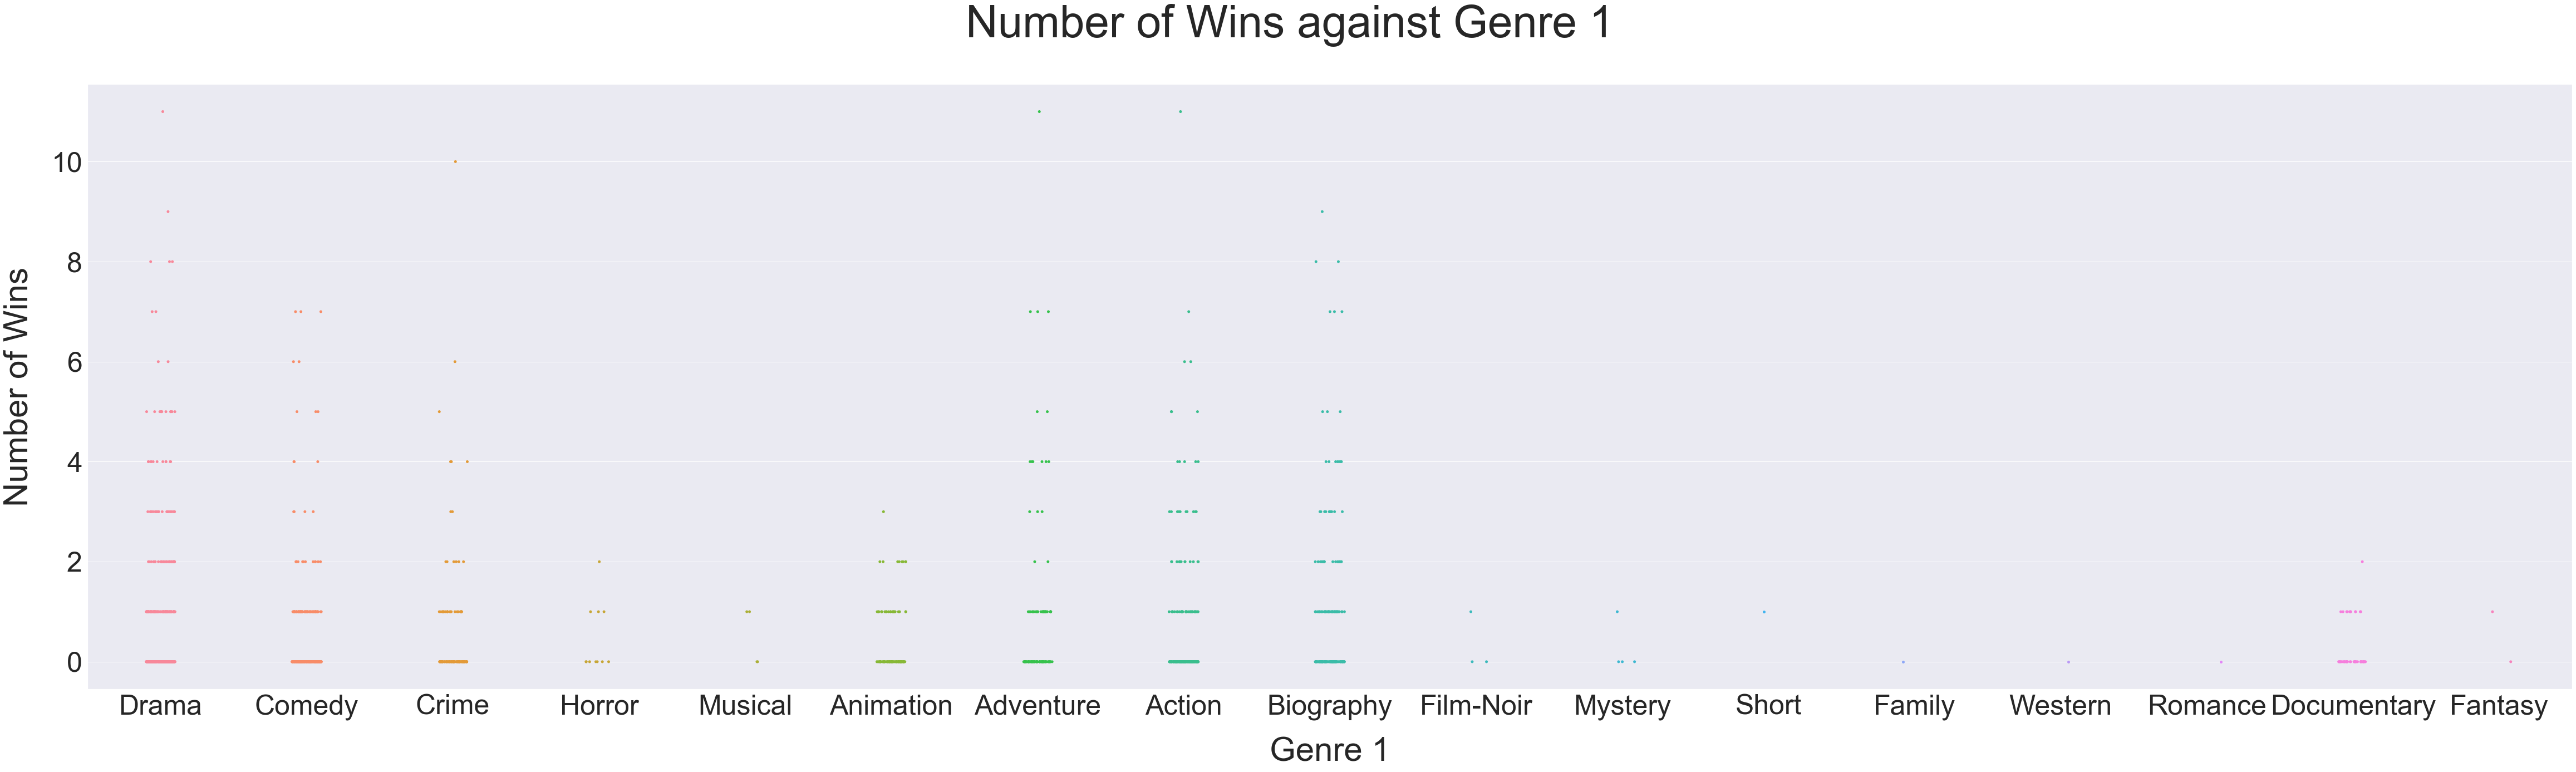

In [86]:
f = plt.figure(figsize=(80, 20))
plot5 = sb.stripplot(x = 'Genre 1', y = 'Number of Wins', data = oscarData)
plot5.xaxis.get_label().set_fontsize(60)
plot5.yaxis.get_label().set_fontsize(60)
plot5.yaxis.labelpad = 30
plot5.xaxis.labelpad = 30
for label in (plot5.get_xticklabels() + plot5.get_yticklabels()): label.set_fontsize(50)
f.suptitle('Number of Wins against Genre 1', fontsize=80, fontdict={"weight": "bold"})

2. Number of Wins against Age Rating

Text(0.5, 0.98, 'Number of Wins against Age Rating')

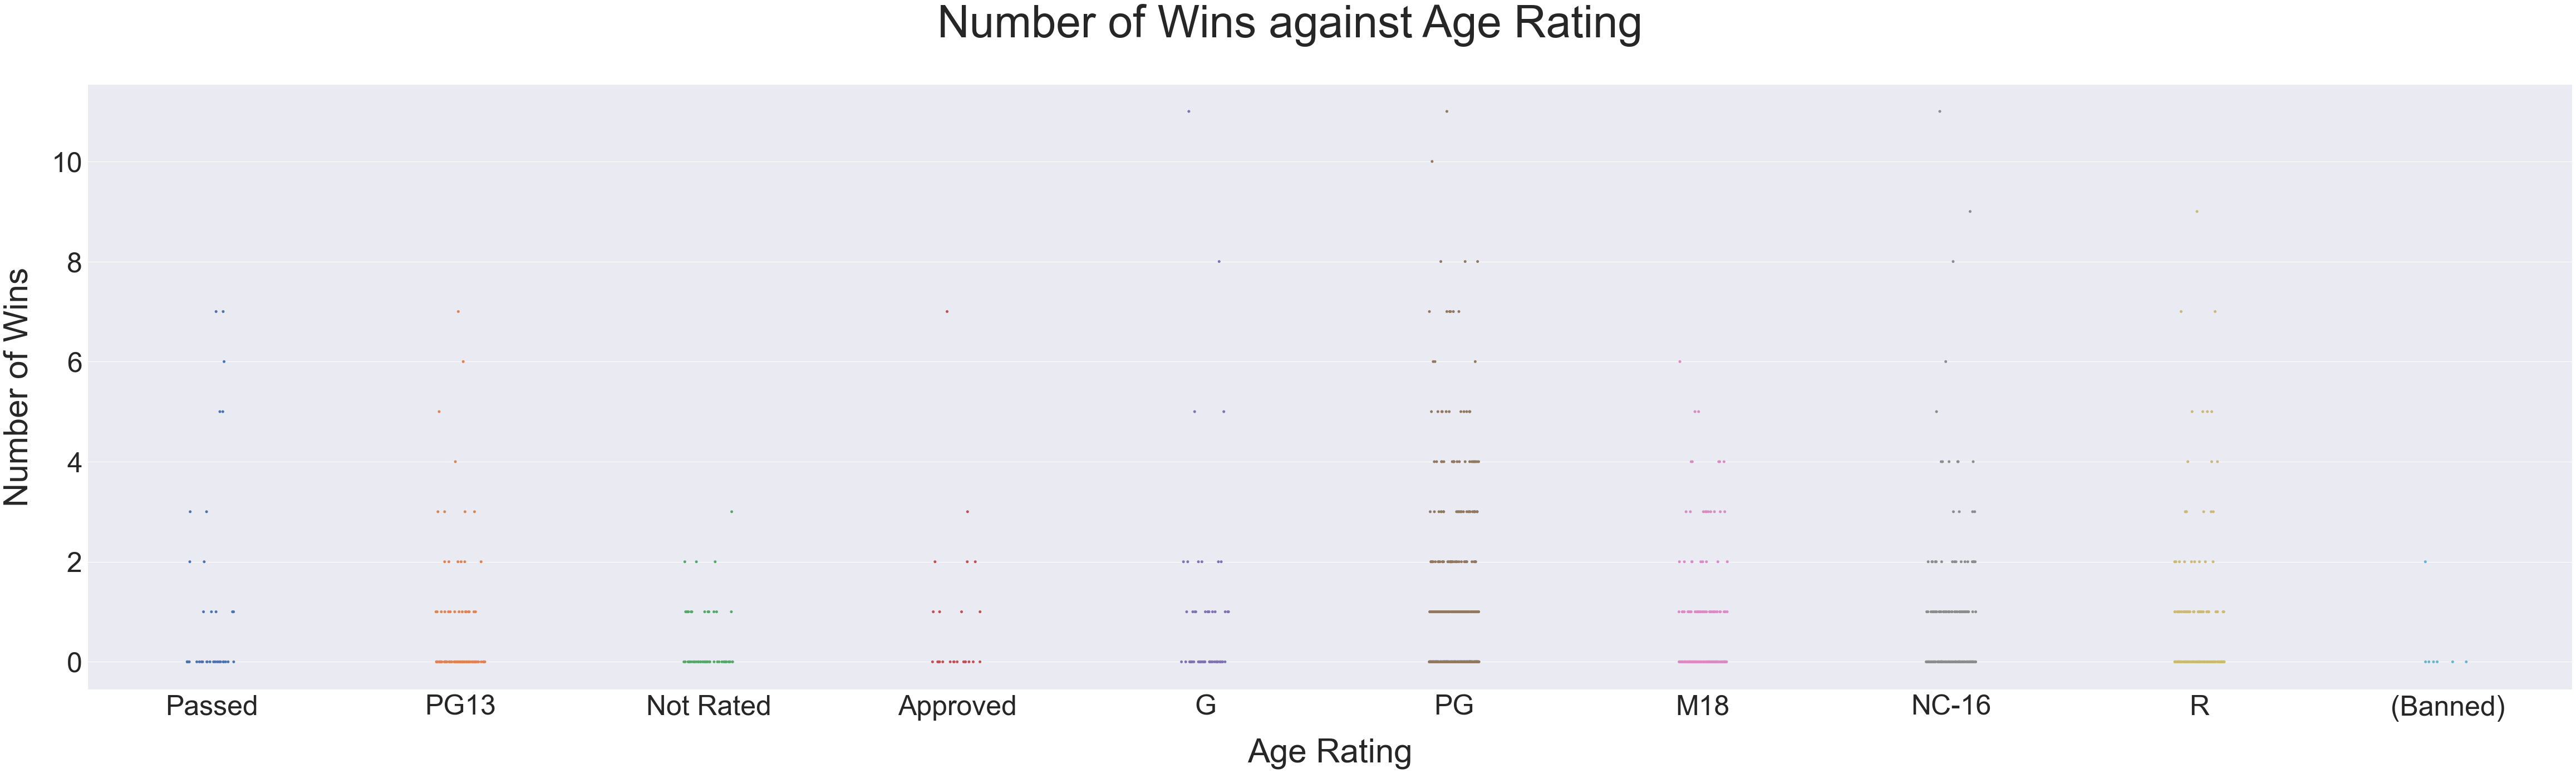

In [87]:
f = plt.figure(figsize=(80, 20))
plot6 = sb.stripplot(x = 'Age Rating', y = 'Number of Wins', data = oscarData)
plot6.xaxis.get_label().set_fontsize(60)
plot6.yaxis.get_label().set_fontsize(60)
plot6.yaxis.labelpad = 30
plot6.xaxis.labelpad = 30
for label in (plot6.get_xticklabels() + plot6.get_yticklabels()): label.set_fontsize(50)
f.suptitle('Number of Wins against Age Rating', fontsize=80, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Number of Wins against English film')

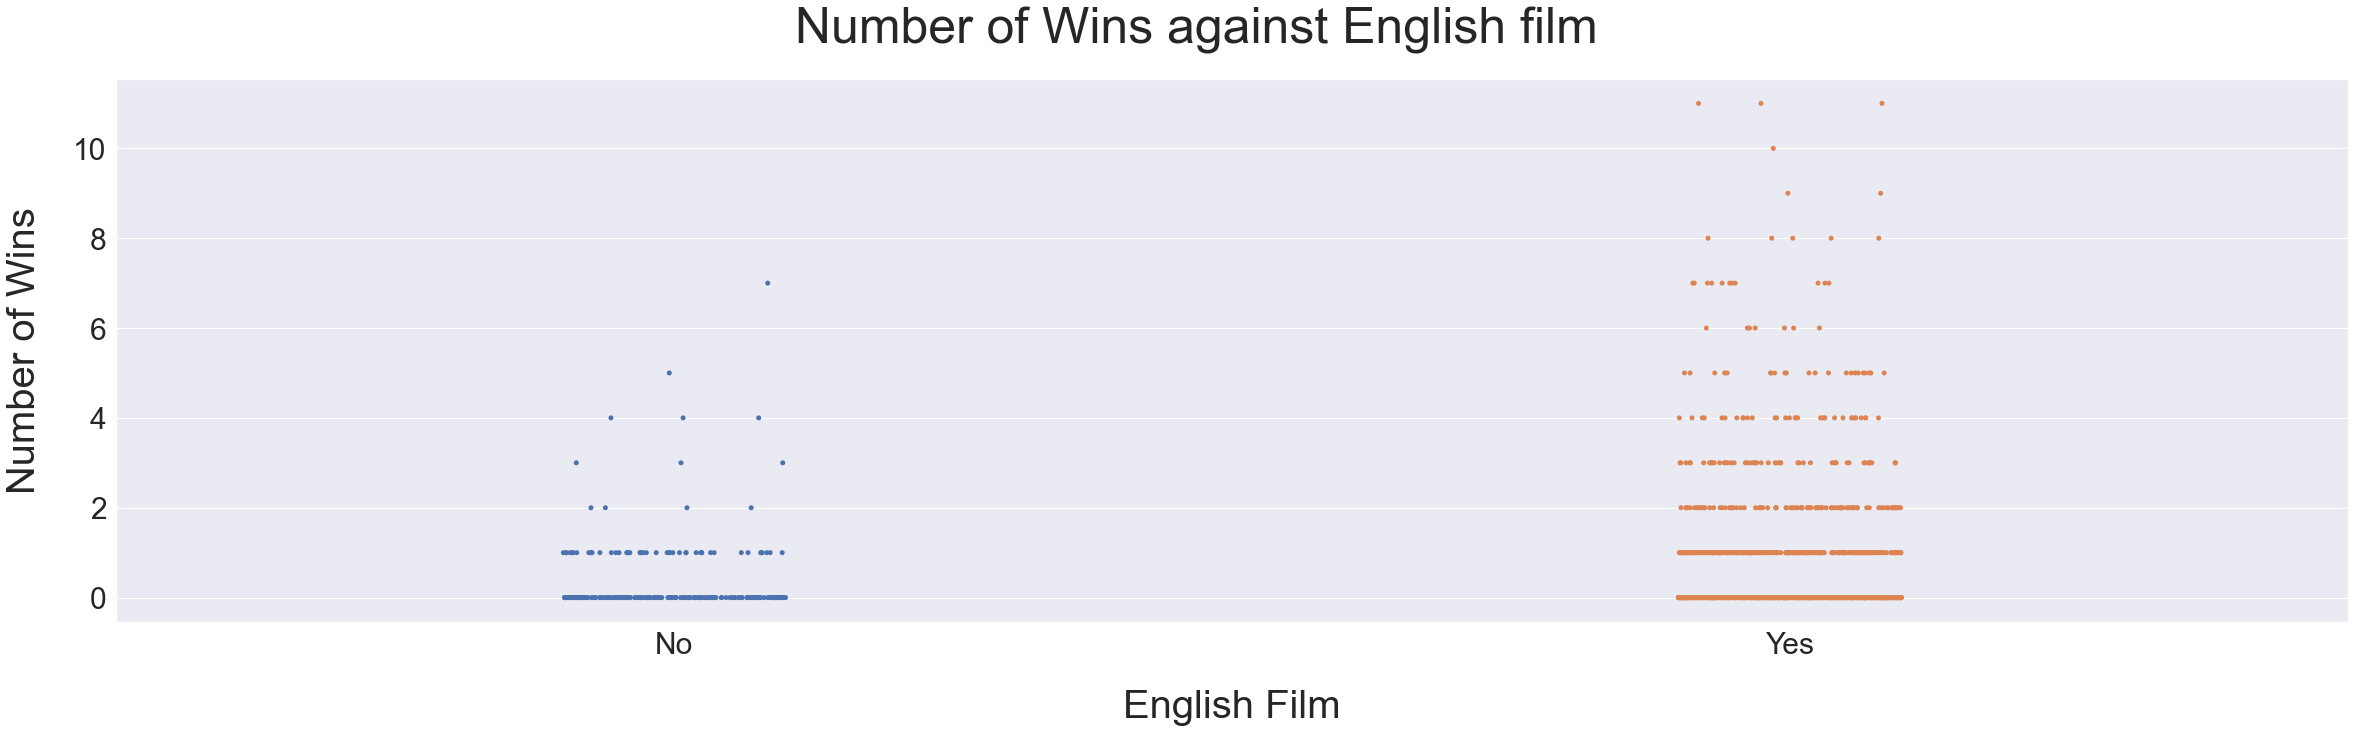

In [88]:
f = plt.figure(figsize=(40, 10))
plot7 = sb.stripplot(x = 'English Film', y = 'Number of Wins', data = oscarData)
plot7.xaxis.get_label().set_fontsize(40)
plot7.yaxis.get_label().set_fontsize(40)
plot7.yaxis.labelpad = 30
plot7.xaxis.labelpad = 30
for label in (plot7.get_xticklabels() + plot7.get_yticklabels()): label.set_fontsize(30)
f.suptitle('Number of Wins against English film', fontsize=50, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Number of Wins against Country of Origin 1')

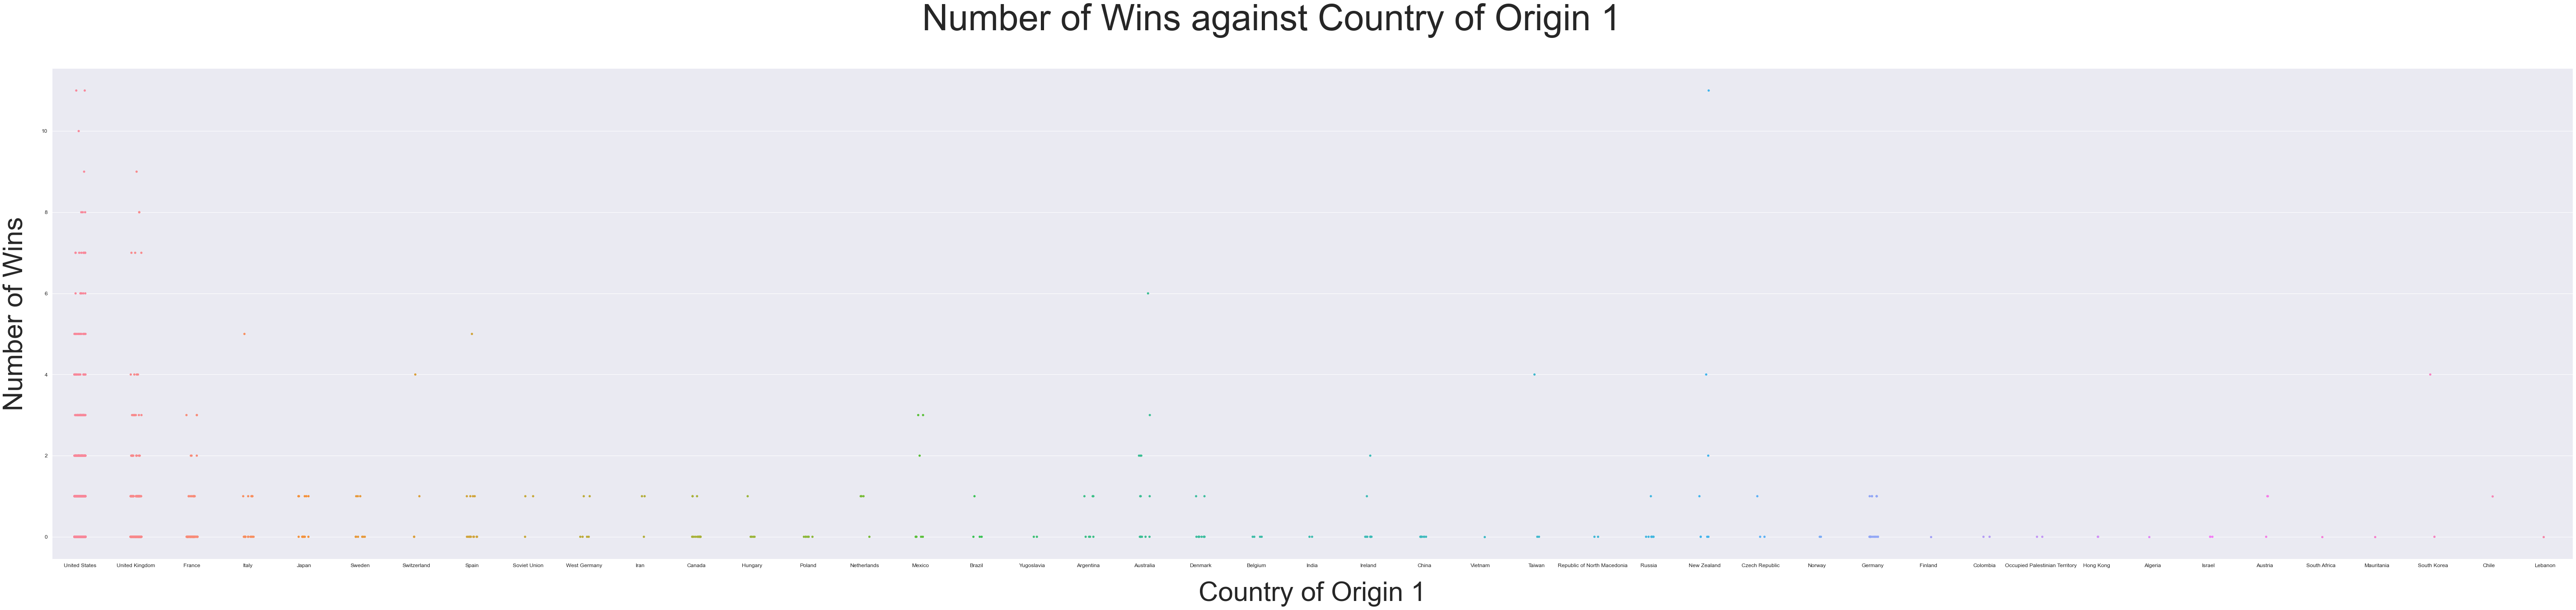

In [89]:
f = plt.figure(figsize=(100, 20))
plot8 = sb.stripplot(x = 'Country of Origin 1', y = 'Number of Wins', data = oscarData)
plot8.xaxis.get_label().set_fontsize(60)
plot8.yaxis.get_label().set_fontsize(60)
plot8.yaxis.labelpad = 30
plot8.xaxis.labelpad = 30
for label in (plot8.get_xticklabels() + plot8.get_yticklabels()): label.set_fontsize(12)
f.suptitle('Number of Wins against Country of Origin 1', fontsize=80, fontdict={"weight": "bold"})

### Checking the effect of the categorical variables on Number of Wins using BoxPlot

In [90]:
catData = pd.concat([catData, oscarData["Number of Wins"]], axis = 1).reindex(catData.index)
catData.head()

Age Rating English Film Genre 1 Country of Origin 1  Number of Wins
0     Passed           No   Drama       United States               3
1       PG13          Yes   Drama       United States               1
2     Passed          Yes  Comedy       United States               0
3     Passed          Yes   Drama       United States               0
4  Not Rated          Yes   Crime       United States               0

Text(0.5, 0.98, 'Boxplot of Number of Wins against Genre1')

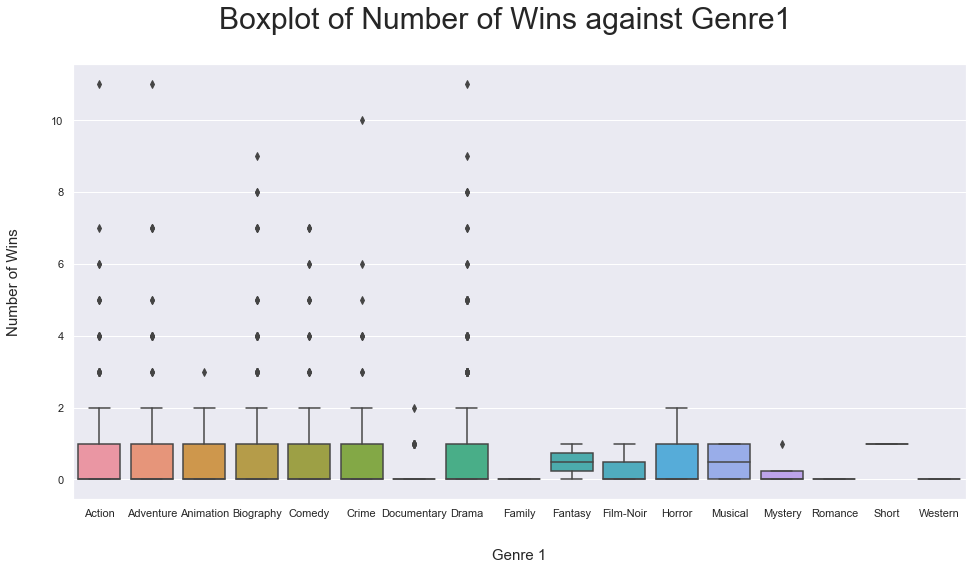

In [91]:
f = plt.figure(figsize=(16, 8))
plot9 = sb.boxplot(x = 'Genre 1', y = 'Number of Wins', data = catData)
plot9.xaxis.get_label().set_fontsize(15)
plot9.yaxis.get_label().set_fontsize(15)
plot9.yaxis.labelpad = 30
plot9.xaxis.labelpad = 30
for label in (plot9.get_xticklabels() + plot9.get_yticklabels()): label.set_fontsize(11)
f.suptitle('Boxplot of Number of Wins against Genre1', fontsize=30, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Boxplot of Number of Wins against Age Rating')

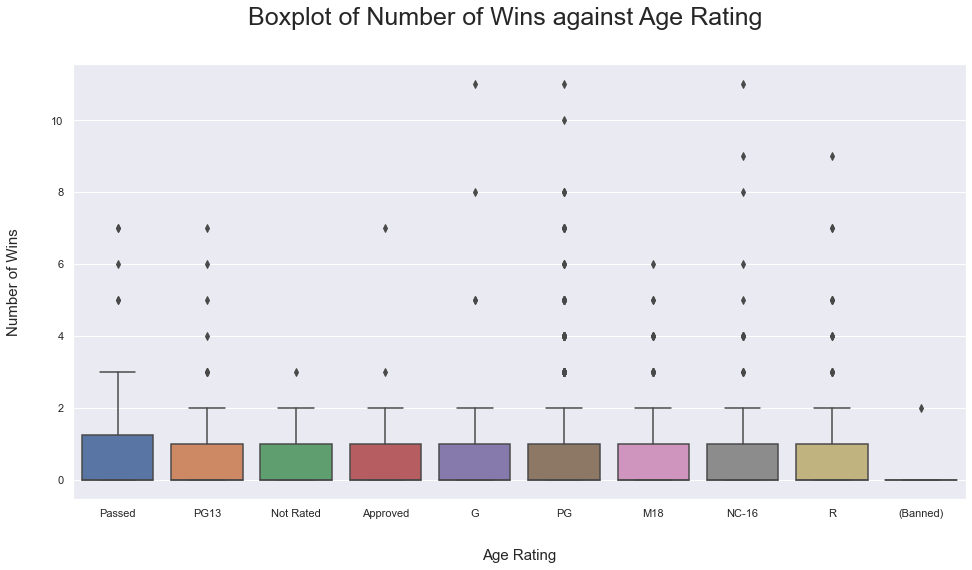

In [92]:
f = plt.figure(figsize=(16, 8))
plot10 = sb.boxplot(x = 'Age Rating', y = 'Number of Wins', data = oscarData)
plot10.xaxis.get_label().set_fontsize(15)
plot10.yaxis.get_label().set_fontsize(15)
plot10.yaxis.labelpad = 30
plot10.xaxis.labelpad = 30
for label in (plot10.get_xticklabels() + plot10.get_yticklabels()): label.set_fontsize(11)
f.suptitle('Boxplot of Number of Wins against Age Rating', fontsize=25, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Boxplot of Number of Wins against English Film')

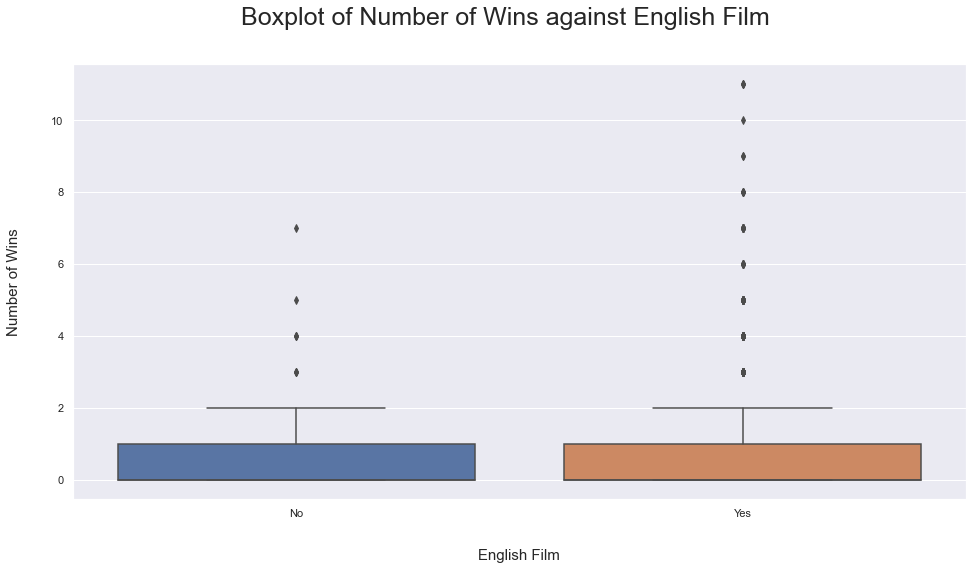

In [93]:
f = plt.figure(figsize=(16, 8))
plot11 = sb.boxplot(x = 'English Film', y = 'Number of Wins', data = oscarData)
plot11.xaxis.get_label().set_fontsize(15)
plot11.yaxis.get_label().set_fontsize(15)
plot11.yaxis.labelpad = 30
plot11.xaxis.labelpad = 30
for label in (plot11.get_xticklabels() + plot11.get_yticklabels()): label.set_fontsize(11)
f.suptitle('Boxplot of Number of Wins against English Film', fontsize=25, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Boxplot of Number of Wins against Country of Origin 1')

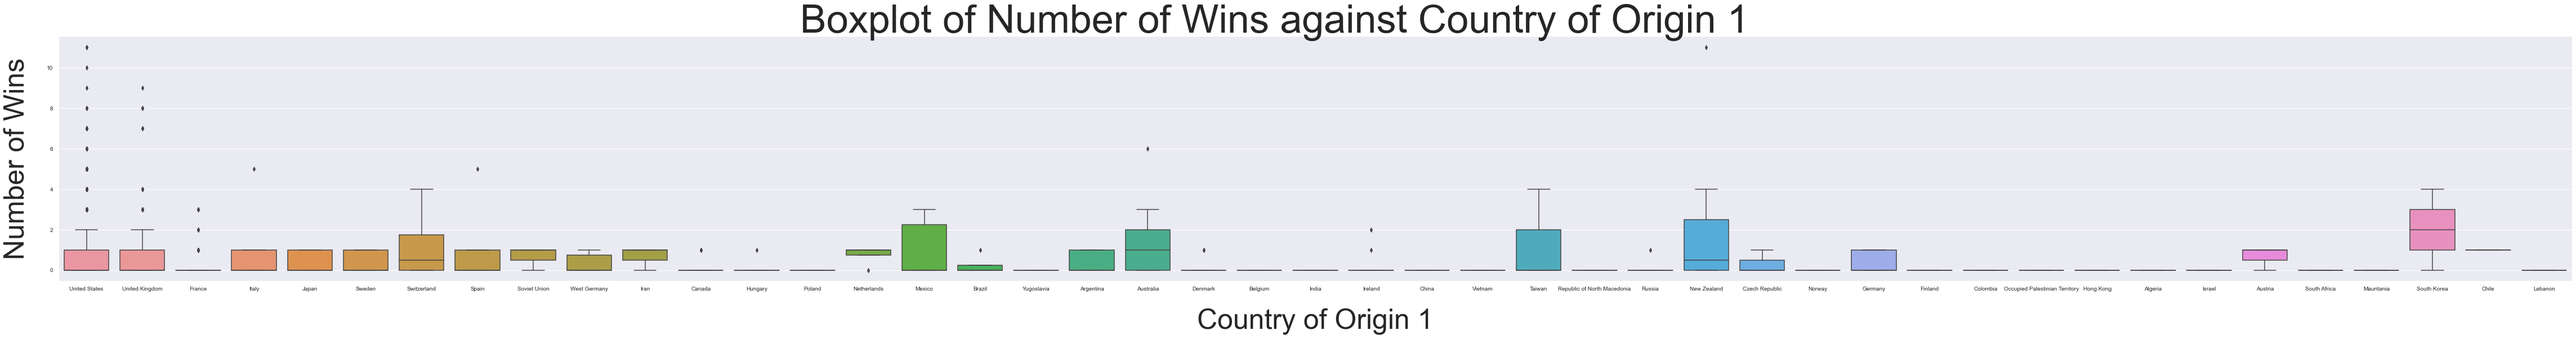

In [94]:
f = plt.figure(figsize=(80, 8))
plot12 = sb.boxplot(x = 'Country of Origin 1', y = 'Number of Wins', data = oscarData)
plot12.xaxis.get_label().set_fontsize(50)
plot12.yaxis.get_label().set_fontsize(50)
plot12.yaxis.labelpad = 30
plot12.xaxis.labelpad = 30
for label in (plot12.get_xticklabels() + plot12.get_yticklabels()): label.set_fontsize(10)
f.suptitle('Boxplot of Number of Wins against Country of Origin 1', fontsize=70, fontdict={"weight": "bold"})